In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import requests
from io import BytesIO
from Validations import *
from tensorflow.keras.optimizers import Adam

## Step 0: Load the CIFAR-10 Dataset

The CIFAR-10 dataset is directly available in TensorFlow/Keras.<br>
Run the cells and load the data.

In [ ]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", 
               "Dog", "Frog", "Horse", "Ship", "Truck"]

## Step 1: Visualize the data

<img src="https://www.researchgate.net/publication/339435251/figure/fig1/AS:861467612028928@1582401292006/Color-image-and-RGB-matrices.jpg" width="500" hight="250"> </br>
Your Task: Get and print the train_images, train_labels, test_images, test_labels shapes.<br>
Replace the none with the corresponding command. with others.

<details>
    <summary>Optional - Extra info</summary>
    <p>
        Data visualization is important because:</br>
<b>Quick Understanding:</b> Turns complex data into easy-to-understand visuals.</br>
<b>Spot Trends:</b> Easier to see patterns and trends in graphs than in numbers.</br>
<b>Effective Communication:</b> Visuals convey information quickly and clearly.</br>
<b>Better Decisions:</b> Helps in making informed decisions based on visual insights.</br>
<b>Surprise Findings:</b> Reveals insights that you might miss in raw data.</br>
It's like transforming numbers into a story that's much easier to understand and share with 
     </p>
</details>

<details>
    <summary>Click for a hint #1</summary>
    <p>You can get the shapes using "---.shape" command.,</br>
    Replace "---" with the variable that you wish to see it's shape. (the varibles names can hint)</p>
</details>

In [ ]:
train_images_shape = None
test_images_shape = None

<details>
    <summary>Click for a hint #2</summary>
    <p>When using the "images.shape" the return value is an tuple (a collection that resembles array) at size 4, each one represent it's some info on the the images.</br>
        Can approach the cells like when approching an array using "x[i]" (meaning cell "i" in the array x)</p>
</details>

<details>
    <summary>Click for a hint #3</summary>
    <p>Each cell in the "images.shape" tuple are representing: number of images, images height, images width, and images channles (in this order)</br>
        Meaning that images.shape[0] = number of images </p>
</details>

In [ ]:
# Extracting dimensions and shapes

num_train_images = None
train_image_height = None
train_image_width = None
train_channels = None

num_test_images = None
test_image_height = None
test_image_width = None
test_channels = None

num_classes = len(class_names)

validate_dataset_info(train_images_shape, num_train_images, train_image_height, train_image_width, train_channels, 
                      test_images_shape, num_test_images, test_image_height, test_image_width, test_channels, 
                      num_classes, train_images, test_images, train_labels,test_labels, class_names)

## Step 2: Explore the Dataset

Visualization: Display a few images from the dataset. </br>
Here we display few plots each one shows us the date in diffrent way.

In [ ]:
images_to_display, labels_to_display = find_unique_images(train_images, train_labels, class_names)

# Plot sample images
plot_sample_images(images_to_display, labels_to_display, class_names)

# Plot class distribution
plot_class_distribution(train_labels, class_names)

# Plot high-dimensional data by reducing it to two dimensions
plot_tsne(train_images, train_labels, class_names)

## Step 3: Preprocess the Data

### 3.1 Change data type

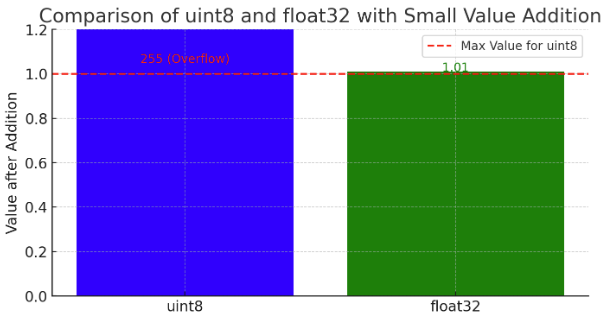</br>
<details>
    <summary>Optional - Extra info</summary>
    <p>
        <b>uint8 Representation (Blue Bar):</b> Since uint8 can only represent integers between 0 and 255, adding any value to 255 results in an overflow. In this case, the addition of 0.01 doesn't increase the value beyond 255 due to the integer nature and limited range of uint8.</br>
        <b>float32 Representation (Green Bar):</b> On the other hand, float32 can represent a much wider range of values, including fractions. When 0.01 is added to the normalized value (1.0), it accurately represents the new value (1.01), showcasing the precision and range capabilities of float32.
    </p>
</details>e.

Your Task: Change the images types from int8 to float32.</br>
Replace the None with the correct function in parameter that it takes so that it will change the type.</br>
You can do so by using the ".astype(---)" command which take a <b>string</b> of the desired type.

<details>
    <summary>Click for a hint</summary>
    <p>You need to use " = train_images.astype(---)" </p>
</details>

In [ ]:
print(f"The traning type: {str(train_images.dtype)}, The testing type: {str(test_images.dtype)}.")

In [ ]:
train_images_32 = None
test_images_32 = None

In [ ]:
print(validate_type(train_images_32,test_images_32))

### 3.2 Normalize data 
<b>Note:</b> Pixel values are usually range between 0-255, when 0 is black and 255 is white.</br>
<img src="https://trembelingart.com/wp-content/uploads/2021/02/Value-Scale-Color.jpg" width="300" hight="150"> </br>
<img src="https://what-when-how.com/wp-content/uploads/2012/07/tmp26dc25_thumb2.png" width="300" hight="150"> </br>
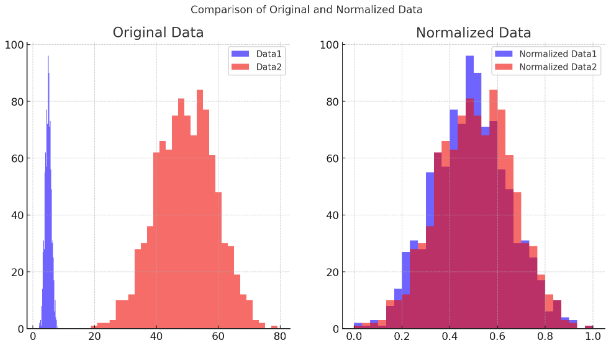</br>

By normalizing, we decrease the gap of the pixels values and compress them.</br> 
This allows the model to work better since the whitest value is not as far from the darkest value. (instead 0-255 we will have 0-1). </br></br>

Your Task: Normalize the data to be between 0-1.</br>
Replace the None with the correct value that need to dived by.</br>

<details>
    <summary>Click for a hint</summary>
    <p>To normalize a value that is in the rage 0-1000 to 0-1 we need to divied by the max value in our range, that is 1000. </br>
        Exmaple: min value : 0/1000 = 0, mid value : 500/1000 = 0.5, max value : 1000/1000 = 1. </p>
</details>

In [ ]:
train_images_norm = train_images_32/None
test_images_norm =  test_images_32/None

print(validate_norm_rage(train_images_norm,test_images_norm))
print("Normalized training set min value:", train_images_norm.min())
print("Normalized training set max value:", test_images_norm.max())

## Step 4: Build the Neural Network Model
<img src="https://cezannec.github.io/assets/cnn_intro/CNN_ex.png" width="500" hight="250"> </br>
Your Task: Build the layers of the network.</br>
Replace the None with the correctvaluey.

<details>
    <summary>Optional - Extra info</summary>
    <p>
        <b>Start Building the Model:</b> Think of model = Sequential() as starting to assemble a Lego structure, block by block.</br>

<b>First Layer - Seeing Basic Patterns:</b> The first convolutional layer (Conv2D) with 32 filters looks at small parts of the image to identify basic patterns like edges. MaxPooling reduces the size of these patterns, focusing on the important features.</br>

<b>Second Layer - Seeing Complex Patterns:</b> The second convolutional layer with 64 filters catches more complex patterns. Again, MaxPooling simplifies these patterns. Dropout randomly ignores some neurons, making the model more robust.</br>
<b>Third Layer - Refining the Analysis:</b> Another convolutional layer and max pooling further refine the detected features, with another dropout for robustness.</br>

<b>Flattening:</b> Flatten() converts the 2D feature maps into a 1D array, prepping the data for the next step.</br>

<b>Dense Layer - Decision Making:</b> A dense layer with 64 units processes these features to start making decisions about the image.</br>

<b>Output Layer - Final Decision:</b> The final dense layer gives the probability of the image belonging to one of the classes (like categories), using softmax activation.</br>

<b>Model Summary:</b> model.summary() is like checking your finished Lego structure, showing how each block contributes to the overall model. </br>
     </p>
</details>

<details>
    <summary>Click for a hint</summary>
    <p>In the input convolutional layer (first Conv2D) the input shape should be the (width,hight,channels) of a of a single image (we alrady know it from before).</br>
        In the output layer (last Dense) should be the number of classes (we alrady know it from before, and the number of classes in).</p>
</details>

In [ ]:
model = Sequential()

# First convolutional layer with MaxPooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(None, None, None)))
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer with MaxPooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Dropout layer

# Third convolutional layer with MaxPooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Dropout layer

# Flatten the output to feed into a DNN
model.add(Flatten())

# Dense layer with 64 units
model.add(Dense(64, activation='relu'))

# Output layer with 10 units (one per class) and softmax activation
model.add(Dense(None, activation='softmax'))

# Print the model summary to check the model architecture
model.summary()

## Step 5: Compile the Model
Compile the model with an optimizer, loss function, and metrics.</br>
<details>
    <summary>Optional - Extra info</summary>
    <p>
        Optimizer: It's like a GPS for a machine learning model, guiding it to improve its performance by adjusting its parameters.</br>
        Loss Function: This is the model's error calculator; it measures how far off its predictions are from the actual results.</br>
        Metrics: These are scorecards, used to evaluate and track how well the model performs on specific task. </br>
     </p>
</details>

In [ ]:
adam_optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=adam_optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Print a message to confirm model compilation
print("Model compiled successfully.")

## Step 6: Train the Model
Your Task: Train the model. For traning the model we will use the ".fit()" function which takes the train images and their labels.</br>
Replace the None with the correct values.

<details>
    <summary>Click for a hint</summary>
    <p>Need to replace the Nones with this logic: None, None = train images after normalizing, train labels</p>
</details>

In [ ]:
epochs = 5

# Train the model
history = model.fit(None, None, batch_size=12, epochs=epochs, validation_data=(test_images_norm, test_labels))

# Print a message to indicate the end of training
print("Model training completed.")

## Step 7: Evaluate the Model
Your Task: Evaluate the model on the test dataset.</br>
For testing the model we will use the ".evaluate()" function which takes the test images and test labels.</br>
Replace the None with the correct values.

<details>
    <summary>Click for a hint</summary>
    <p>Need to replace the Nones with this logic: None, None = test images after normalizing, test labels</p>
</details>

In [ ]:

_, test_accuracy = model.evaluate(None, None)

# Print the test dataset accuracy
print("Test accuracy:", test_accuracy)

## Step 8: Test it yourself!

Your Task: Find an image of one classes and test the model.</br>
Replace the None with the url of an image (use and image of one of the classes).

In [ ]:
# URL of the image to predict
image_url = None

# Load and preprocess the image
img_array = load_and_preprocess_image(image_url)
# Predict the image
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]

# Display the image and prediction
plt.imshow(img_array[0])
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()

## Improvment
Try to play with the numbers of epochs to get a better "accuracy" results!
For even more improvments can test other parameters like lerning rate, sizes of 